In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [3]:
#Sử dụng pandas để đọc dữ liệu
df = pd.read_csv('Case_study_CarPrice_Assignment.csv')

In [4]:
#Hiểu ý nghĩa của từng thuộc tính được cung cấp trong bộ dữ liệu
df.info()
#Dựa trên kết quả câu lệnh trên, ta biết được ý nghĩa của từng thuộc tính như sau:
#car_ID : Mã xe => dạng số nguyên
#symboling: Mức độ an toàn (giá trị trong khoảng từ 2 tới 3, trong đó giá trị -2: tuyệt đối an toàn, 3: có rủi ro) => số nguyên, định lượng
#carName: Tên xe => dạng object (chuỗi kí tự), định tính
#fueltype: Loại nhiên liệu => dạng object (chuỗi kí tự) , định tính
#aspiration: loại hút (turbo hoặc std) => dạng object (chuỗi kí tự) , định tính
#doornumber: Số lượng cửa => dạng object (chuỗi kí tự) , định lượng
#carbody: Loại thân xe (sedan, wagon, hatchback) => dạng object (chuỗi kí tự), định tính
#drivewheel: Loại bánh xe => dạng object (chuỗi kí tự), định tính
#enginelocation: Vị trí động cơ => dạng object (chuỗi kí tự), định tính
#wheelbase: Chiều dài cơ sở => dạng float , định lượng
#carlength: Chiều dài xe => dạng float , định lượng
#carwidth: Chiều rộng xe => dạng float , định lượng
#carheight: Chiều cao xe => dạng float, định lượng
#curbweight: Trọng lượng của xe khi không có người hoặc hành lý  => dạng số nguyên, định lượng
#enginetype: Loại động cơ => dạng object (chuỗi kí tự) , định tính
#cylindernumber: Số lượng xi lanh đặt trong xe => dạng object (chuỗi kí tự) , định lượng
#enginesize: Kích thước động cơ => dạng số nguyên , định lượng
#fuelsystem: Hệ thống nhiên liệu của xe ô tô => dạng object (chuỗi kí tự)  , định tính
#boreratio: Tỉ số hành trình => dạng float , định lượng
#stroke: số kỳ hoăc kích thước bên trong động cơ => dạng float , định lượng
#compressionratio: Tỉ số nén của ôtô => dạng float , định lượng
#horsepower: Mã lực => dạng số nguyên , định lượng
#peakrpm: Tốc độ động cơ cao nhất => dạng số nguyên, định lượng
#citympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trong thành phố => dạng số nguyên, định lượng
#highwaympg: số dặm đi được cho 1 galon (~4.5 l) nhiên liệu trên đường cao tốc => dạng số nguyên, định lượng
#price: Giá xe => dạng float ,y_var

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
#Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [8]:
 #Phân tách hãng xe, tên xe
df['CarBrand'] = df['CarName'].apply(lambda x: x.split(' ')[0])
df['CarModel'] = df['CarName'].apply(lambda x: ' '.join(x.split(' ')[1:]))
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,CarModel
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [10]:
#phát hiện và sửa sai dữ liệu
#1, check CarBrand
print(df['CarBrand'].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan'
 'peugeot' 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru'
 'toyota' 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


In [11]:
#thấy 1 số CarBrand sai nên sửa lại chính tả
df['CarBrand'] = df['CarBrand'].replace({
    'toyouta': 'toyota',
    'Nissan': 'nissan',
    'maxda': 'mazda',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'porcshce': 'porsche'
})

# Kiểm tra lại sau khi sửa
print(df['CarBrand'].unique())

# Lưu dữ liệu sau khi đã sửa
df.to_csv('cleaned_car_data.csv', index=False)

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


In [12]:
#Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
#ở step đọc dữ liệu bên trên có một số thuộc tính sai định dạng nên cần sửa lại
# kiểm tra dữ liệu
print(df['cylindernumber'].unique())
print(df['doornumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['two' 'four']


In [14]:
# Chuyển đổi 'cylindernumber' từ chuỗi ký tự thành số nguyên
df['cylindernumber'] = df['cylindernumber'].replace({
    'two': 2, 'three': 3, 'four': 4, 'five': 5,
    'six': 6, 'eight': 8, 'twelve': 12
})

# Chuyển đổi 'doornumber' từ chuỗi ký tự thành số nguyên
df['doornumber'] = df['doornumber'].replace({
    'two': 2, 'four': 4
})

# Kiểm tra lại sau khi sửa
print(df['cylindernumber'].unique())
print(df['doornumber'].unique())

# Lưu dữ liệu sau khi đã sửa
df.to_csv('cleaned_car_data.csv', index=False)
#

[ 4  6  5  3 12  2  8]
[2 4]


In [15]:
# Chuyển đổi các cột từ object sang int
df['cylindernumber'] = df['cylindernumber'].astype(int)
df['doornumber'] = df['doornumber'].astype(int)

In [17]:
#kiểm tra lại dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    int64  
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    int64  
 16  enginesize        205 non-null    int64  
 1

In [18]:
#save lại sau khi sửa
df.to_csv('cleaned_car_data.csv', index=False)

In [21]:
#Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả

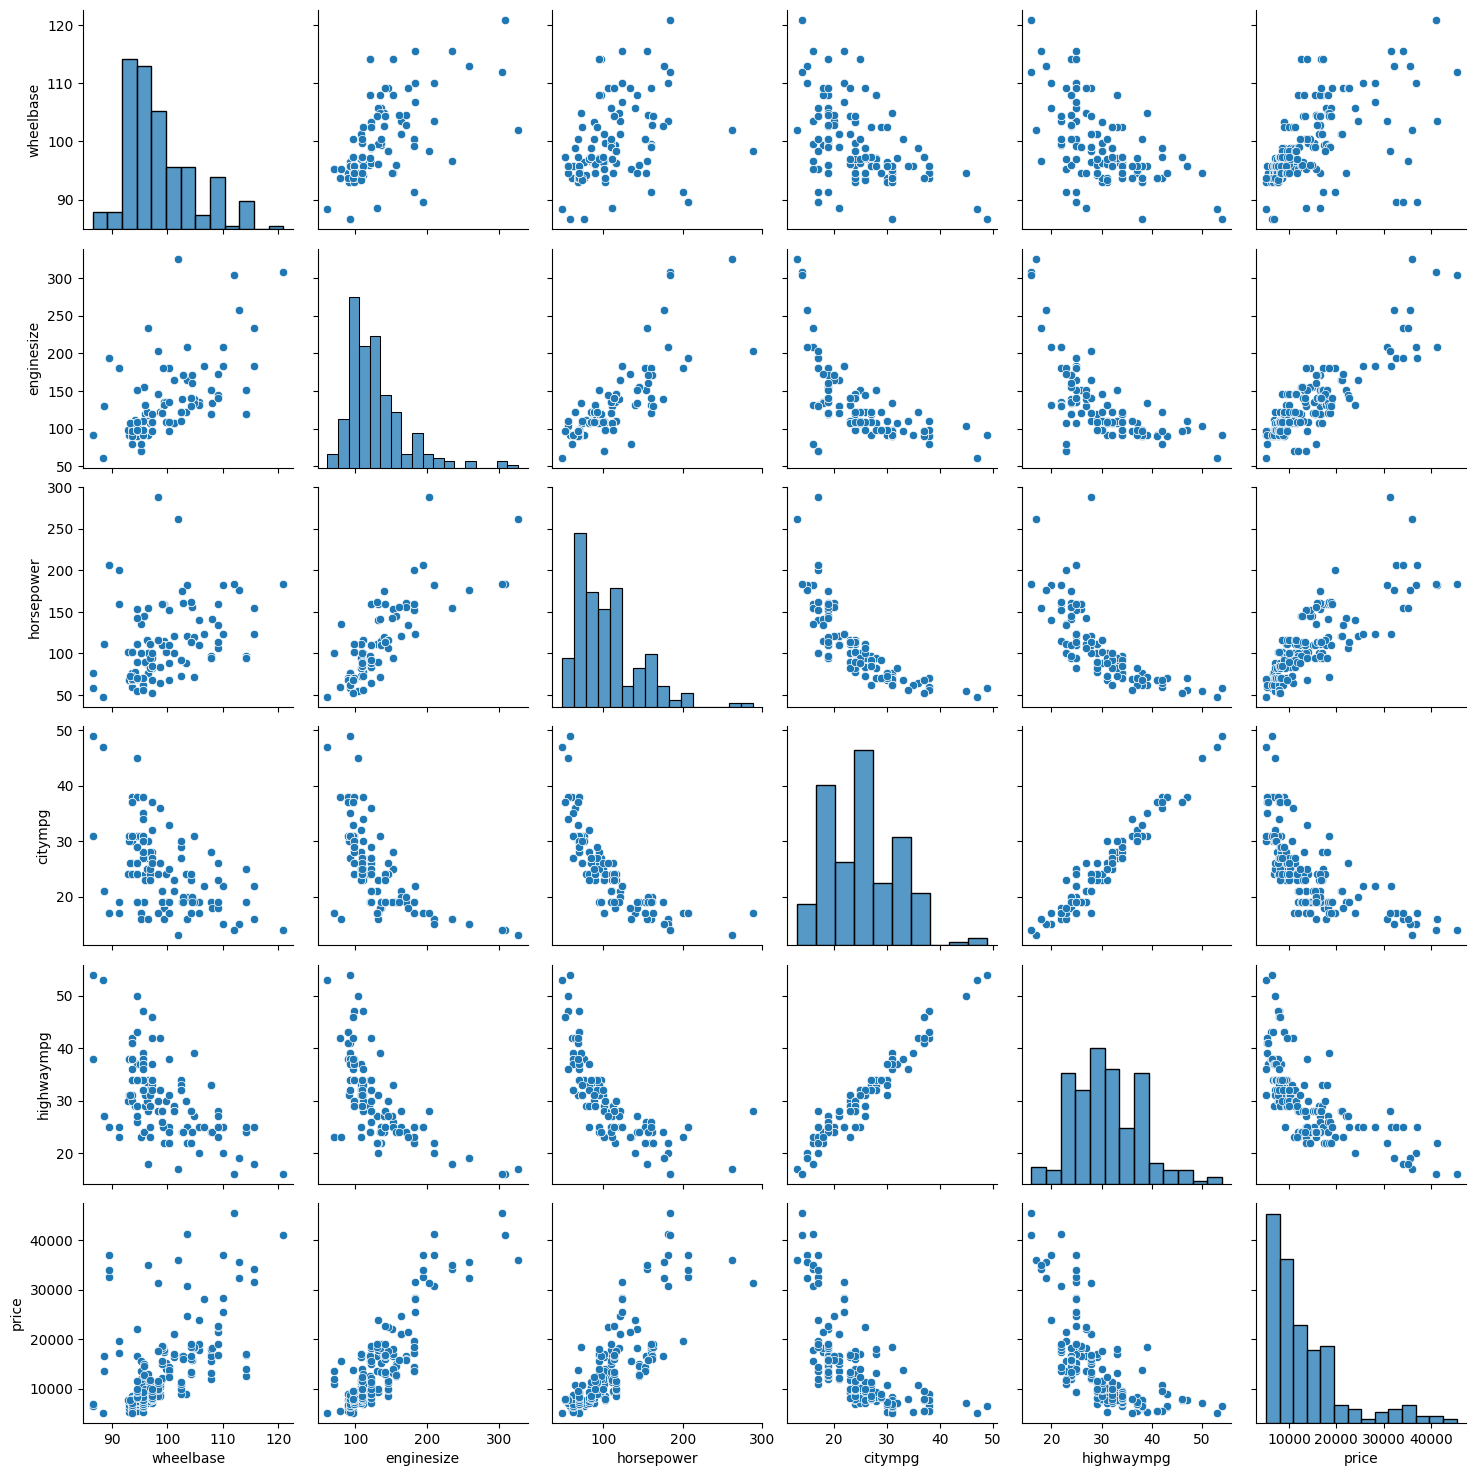

In [20]:
# Biểu đồ Pairplot cho một số thuộc tính định lượng và 'price'
sns.pairplot(df[['wheelbase', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'price']])
plt.show()

In [24]:
#Nhận xét các thuộc tính gây ảnh hưởng tới giá
import scipy.stats as stats
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarBrand,CarModel
0,1,3,alfa-romero giulia,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,giulia
1,2,3,alfa-romero stelvio,gas,std,2,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,stelvio
2,3,1,alfa-romero Quadrifoglio,gas,std,2,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,Quadrifoglio
3,4,2,audi 100 ls,gas,std,4,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,100 ls
4,5,2,audi 100ls,gas,std,4,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,100ls


In [27]:
# thuộc tính định lượng
stats.pearsonr(df.symboling,df.price)

PearsonRResult(statistic=-0.07997822464270349, pvalue=0.2543117584863517)

In [29]:
stats.pearsonr(df.doornumber,df.price)

PearsonRResult(statistic=0.03183526584560969, pvalue=0.650448395329912)

In [30]:
stats.pearsonr(df.wheelbase,df.price)

PearsonRResult(statistic=0.5778155982921501, pvalue=1.182820486337694e-19)

In [31]:
stats.pearsonr(df.carlength,df.price)

PearsonRResult(statistic=0.6829200156779621, pvalue=1.6787066240745445e-29)

In [32]:
stats.pearsonr(df.carwidth,df.price)

PearsonRResult(statistic=0.7593252997415115, pvalue=9.627437876118924e-40)

In [33]:
stats.pearsonr(df.carheight,df.price)

PearsonRResult(statistic=0.11933622657049445, pvalue=0.08832832352274969)

In [34]:
stats.pearsonr(df.curbweight,df.price)

PearsonRResult(statistic=0.8353048793372968, pvalue=1.2144448264030345e-54)

In [35]:
stats.pearsonr(df.enginesize,df.price)

PearsonRResult(statistic=0.8741448025245117, pvalue=1.3547637598648963e-65)

In [36]:
stats.pearsonr(df.boreratio,df.price)

PearsonRResult(statistic=0.5531732367984437, pvalue=7.907922278248891e-18)

In [37]:
stats.pearsonr(df.cylindernumber,df.price)

PearsonRResult(statistic=0.7183049020002832, pvalue=8.028863372444576e-34)

In [38]:
stats.pearsonr(df.stroke,df.price)

PearsonRResult(statistic=0.079443083881931, pvalue=0.2575137159090866)

In [39]:
stats.pearsonr(df.compressionratio,df.price)

PearsonRResult(statistic=0.06798350579944264, pvalue=0.33277236122380593)

In [40]:
stats.pearsonr(df.horsepower,df.price)

PearsonRResult(statistic=0.8081388225362216, pvalue=1.4834365732940885e-48)

In [41]:
stats.pearsonr(df.peakrpm,df.price)

PearsonRResult(statistic=-0.08526715027785688, pvalue=0.22414123444666736)

In [42]:
stats.pearsonr(df.citympg,df.price)

PearsonRResult(statistic=-0.6857513360270397, pvalue=7.978684249663508e-30)

In [43]:
stats.pearsonr(df.highwaympg,df.price)

PearsonRResult(statistic=-0.6975990916465562, pvalue=3.230681380364674e-31)

In [ ]:
#dựa trên kết quả trên thì các thuộc tính định lượng ảnh hưởng tới giá là:
#wheelbase, carlength, carwidth, enginesize, curbweight, cylindernumber, boreratio, horsepower, citympg, highwaympg

In [45]:
#check biến định tính xem có ảnh hưởng tới giá xe ko
stats.chi2_contingency(pd.crosstab(df.CarBrand,df.price))

Chi2ContingencyResult(statistic=4076.8395697439814, pvalue=0.07466118026467418, dof=3948, expected_freq=array([[0.01463415, 0.01463415, 0.01463415, ..., 0.01463415, 0.01463415,
        0.01463415],
       [0.03414634, 0.03414634, 0.03414634, ..., 0.03414634, 0.03414634,
        0.03414634],
       [0.03902439, 0.03902439, 0.03902439, ..., 0.03902439, 0.03902439,
        0.03902439],
       ...,
       [0.15609756, 0.15609756, 0.15609756, ..., 0.15609756, 0.15609756,
        0.15609756],
       [0.05853659, 0.05853659, 0.05853659, ..., 0.05853659, 0.05853659,
        0.05853659],
       [0.05365854, 0.05365854, 0.05365854, ..., 0.05365854, 0.05365854,
        0.05365854]]))

In [46]:
stats.chi2_contingency(pd.crosstab(df.CarModel,df.price))

Chi2ContingencyResult(statistic=26240.0, pvalue=0.8779884687798877, dof=26508, expected_freq=array([[0.0097561 , 0.0097561 , 0.0097561 , ..., 0.0097561 , 0.0097561 ,
        0.0097561 ],
       [0.00487805, 0.00487805, 0.00487805, ..., 0.00487805, 0.00487805,
        0.00487805],
       [0.0097561 , 0.0097561 , 0.0097561 , ..., 0.0097561 , 0.0097561 ,
        0.0097561 ],
       ...,
       [0.00487805, 0.00487805, 0.00487805, ..., 0.00487805, 0.00487805,
        0.00487805],
       [0.00487805, 0.00487805, 0.00487805, ..., 0.00487805, 0.00487805,
        0.00487805],
       [0.00487805, 0.00487805, 0.00487805, ..., 0.00487805, 0.00487805,
        0.00487805]]))

In [47]:
stats.chi2_contingency(pd.crosstab(df.fueltype,df.price))

Chi2ContingencyResult(statistic=193.64189189189187, pvalue=0.37357405035119345, dof=188, expected_freq=array([[0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.09756098, 0.19512195, 0.09756098, 0.09756098,
        0.19512195, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.19512195, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.19512195,
        0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.19512195, 0.09756098, 0.09756098, 0.19512195,
        0.09756098, 0.09756098, 0.09756098, 0.19512195, 0.19512195,
        0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.09756098, 0.09756098, 0.09756098, 0.09756098,
        0.09756098, 0.19512195, 0.09756098, 0.09756098, 0.09756098,
        0.195

In [48]:
stats.chi2_contingency(pd.crosstab(df.aspiration,df.price))

Chi2ContingencyResult(statistic=201.61961068211068, pvalue=0.23567451722289615, dof=188, expected_freq=array([[0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 0.8195122 , 1.63902439, 0.8195122 , 0.8195122 ,
        1.63902439, 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        1.63902439, 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 1.63902439,
        0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 1.63902439, 0.8195122 , 0.8195122 , 1.63902439,
        0.8195122 , 0.8195122 , 0.8195122 , 1.63902439, 1.63902439,
        0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 , 0.8195122 ,
        0.8195122 , 1.63902439, 0.8195122 , 0.8195122 , 0.8195122 ,
        1.639

In [49]:
stats.chi2_contingency(pd.crosstab(df.carbody,df.price))

Chi2ContingencyResult(statistic=786.0529761904761, pvalue=0.18881080638706618, dof=752, expected_freq=array([[0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.02926829, 0.05853659, 0.02926829, 0.02926829,
        0.05853659, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.05853659, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.05853659,
        0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.05853659, 0.02926829, 0.02926829, 0.05853659,
        0.02926829, 0.02926829, 0.02926829, 0.05853659, 0.05853659,
        0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.02926829, 0.02926829, 0.02926829, 0.02926829,
        0.02926829, 0.05853659, 0.02926829, 0.02926829, 0.02926829,
        0.0585

In [50]:
stats.chi2_contingency(pd.crosstab(df.drivewheel,df.price))

Chi2ContingencyResult(statistic=395.55409356725147, pvalue=0.23414149506469245, dof=376, expected_freq=array([[0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.04390244, 0.08780488, 0.04390244, 0.04390244,
        0.08780488, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.08780488, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.08780488,
        0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.08780488, 0.04390244, 0.04390244, 0.08780488,
        0.04390244, 0.04390244, 0.04390244, 0.08780488, 0.08780488,
        0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.04390244, 0.04390244, 0.04390244, 0.04390244,
        0.04390244, 0.08780488, 0.04390244, 0.04390244, 0.04390244,
        0.087

In [51]:
stats.chi2_contingency(pd.crosstab(df.enginelocation,df.price))

Chi2ContingencyResult(statistic=204.99999999999997, pvalue=0.18788097182586638, dof=188, expected_freq=array([[0.98536585, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 0.98536585, 1.97073171, 0.98536585, 0.98536585,
        1.97073171, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        1.97073171, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 0.98536585, 0.98536585, 0.98536585, 1.97073171,
        0.98536585, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 1.97073171, 0.98536585, 0.98536585, 1.97073171,
        0.98536585, 0.98536585, 0.98536585, 1.97073171, 1.97073171,
        0.98536585, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 0.98536585, 0.98536585, 0.98536585, 0.98536585,
        0.98536585, 1.97073171, 0.98536585, 0.98536585, 0.98536585,
        1.970

In [52]:
stats.chi2_contingency(pd.crosstab(df.enginetype,df.price))

Chi2ContingencyResult(statistic=1188.9644837144838, pvalue=0.10113915243485812, dof=1128, expected_freq=array([[0.05853659, 0.05853659, 0.05853659, ..., 0.05853659, 0.05853659,
        0.05853659],
       [0.00487805, 0.00487805, 0.00487805, ..., 0.00487805, 0.00487805,
        0.00487805],
       [0.05853659, 0.05853659, 0.05853659, ..., 0.05853659, 0.05853659,
        0.05853659],
       ...,
       [0.07317073, 0.07317073, 0.07317073, ..., 0.07317073, 0.07317073,
        0.07317073],
       [0.06341463, 0.06341463, 0.06341463, ..., 0.06341463, 0.06341463,
        0.06341463],
       [0.0195122 , 0.0195122 , 0.0195122 , ..., 0.0195122 , 0.0195122 ,
        0.0195122 ]]))

In [53]:
stats.chi2_contingency(pd.crosstab(df.fuelsystem,df.price))

Chi2ContingencyResult(statistic=1395.649957016978, pvalue=0.06236620171412716, dof=1316, expected_freq=array([[0.05365854, 0.05365854, 0.05365854, ..., 0.05365854, 0.05365854,
        0.05365854],
       [0.32195122, 0.32195122, 0.32195122, ..., 0.32195122, 0.32195122,
        0.32195122],
       [0.01463415, 0.01463415, 0.01463415, ..., 0.01463415, 0.01463415,
        0.01463415],
       ...,
       [0.45853659, 0.45853659, 0.45853659, ..., 0.45853659, 0.45853659,
        0.45853659],
       [0.04390244, 0.04390244, 0.04390244, ..., 0.04390244, 0.04390244,
        0.04390244],
       [0.00487805, 0.00487805, 0.00487805, ..., 0.00487805, 0.00487805,
        0.00487805]]))

In [54]:
#kết luận: dựa vào các kết quả trên, ta thấy p-value đều >=0.05 nên kết luận là không có thuộc tính định tính nào ảnh hưởng tới giá xe.

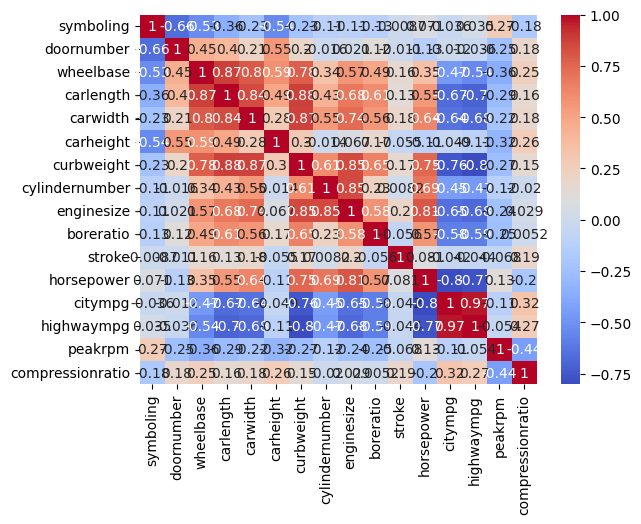

In [56]:
#Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng
corr_matrix = df[['symboling','doornumber','wheelbase','carlength','carwidth','carheight','curbweight','cylindernumber','enginesize','boreratio','stroke','horsepower','citympg','highwaympg','peakrpm','compressionratio']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [59]:
#Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu
pd.get_dummies(df[['CarBrand','CarModel','fueltype','aspiration','carbody','drivewheel','enginelocation','enginetype','fuelsystem']],drop_first=True)

,CarBrand_audi,CarBrand_bmw,CarBrand_buick,CarBrand_chevrolet,CarBrand_dodge,CarBrand_honda,CarBrand_isuzu,CarBrand_jaguar,CarBrand_mazda,CarBrand_mercury,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
201,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
202,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [101]:
#Xây dựng mô hình hồi quy tuyến tính bằng thư viện sklearn, sử dụng thêm feature
#selection để chọn các thuộc tính tốt nhất.
x = df[['wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower', 'citympg', 'cylindernumber']]
y = df['price']

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [108]:
lr = LinearRegression()
lr.fit(x_train, y_train)
# Dự đoán trên tập kiểm tra
y_pred = lr.predict(x_test)

In [109]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 15789103.636018597
R-squared: 0.796049517200189


In [125]:
#Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS
X_train_const = sm.add_constant(x_train)

# Ensure all columns in X_train_const and y_train are numeric
X_train_const = X_train_const.apply(pd.to_numeric, errors='coerce')
y_train = pd.to_numeric(y_train, errors='coerce')

# Xây dựng mô hình OLS
model = sm.OLS(y_train, X_train_const)
result = model.fit()

# In kết quả
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     81.41
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           5.71e-54
Time:                        20:03:56   Log-Likelihood:                -1557.8
No. Observations:                 164   AIC:                             3136.
Df Residuals:                     154   BIC:                             3167.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -5.318e+04   1.59e+04     -3.

In [128]:
#chạy lần 2
x1 = df[['wheelbase', 'carlength', 'carwidth', 'enginesize', 'curbweight', 'boreratio', 'horsepower', 'citympg', 'cylindernumber']]
y1 = df['price']
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=101)
lr = LinearRegression()
lr.fit(x1_train, y1_train)
# Dự đoán trên tập kiểm tra
y1_pred = lr.predict(x1_test)
mse = mean_squared_error(y1_test, y1_pred)
r2 = r2_score(y1_test, y1_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 6264547.069153176
R-squared: 0.8130230438872349


In [130]:
#Có thể sử dụng thêm các thư viện khác để xây dựng mô hình như statsAPI.OLS
X1_train_const = sm.add_constant(x1_train)

# Ensure all columns in X1_train_const and y1_train are numeric
X1_train_const = X1_train_const.apply(pd.to_numeric, errors='coerce')
y1_train = pd.to_numeric(y1_train, errors='coerce')

# Xây dựng mô hình OLS
model = sm.OLS(y1_train, X1_train_const)
result = model.fit()

# In kết quả
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     76.45
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           2.93e-52
Time:                        20:14:01   Log-Likelihood:                -1573.6
No. Observations:                 164   AIC:                             3167.
Df Residuals:                     154   BIC:                             3198.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.35e+04   1.57e+04     -2.

In [ ]:
#Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.
#mô hình 1:
#Mean Squared Error: 15789103.636018597
#R-squared: 0.796049517200189
#mô hình 2:
#Mean Squared Error: 6264547.069153176
#R-squared: 0.8130230438872349
#=> mô hình 2 tốt hơn mô hình 1 về khả năng giải thích biến động trong dữ liệu so với mô hình 1
#=> mô hình 2 tốt hơn mô hình 1 về độ chính xác trong dự đoán giá xe